In [1]:
import pandas as pd
import numpy as np
import os
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [13]:
# path
human_goslim_up_path = '../data/human_annotation/human_annotation_up.tsv'
rice_goslim_up_path = '../data/rice_annotation/rice_annotation_up.tsv'

human_goslim_all_path = '../data/biomart_goslim/biomart_human_goslim_R110.tsv'
rice_goslim_all_path = '../data/biomart_goslim/biomart_rice_goslim_R56.tsv'

In [14]:
human_goslim_up = pd.read_csv(human_goslim_up_path, sep='\t')
rice_goslim_up = pd.read_csv(rice_goslim_up_path, sep='\t')
human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')

human_goslim_all = human_goslim_all.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)', 'GOSlim GOA Description'], keep='first').copy()
rice_goslim_all = rice_goslim_all.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)', 'GOSlim GOA Description'], keep='first').copy()

display(human_goslim_up)
display(rice_goslim_up)
display(human_goslim_all)
display(rice_goslim_all)

/tmp/ipykernel_33259/269868789.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  human_goslim_all = pd.read_csv(human_goslim_all_path, sep='\t')
/tmp/ipykernel_33259/269868789.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  rice_goslim_all = pd.read_csv(rice_goslim_all_path, sep='\t')


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5),name
0,ENSG00000173110,1,161524540,161526894,GO:0003824,catalytic activity,245,HSPA6
1,ENSG00000173110,1,161524540,161526894,GO:0005576,extracellular region,245,HSPA6
2,ENSG00000173110,1,161524540,161526894,GO:0140657,ATP-dependent activity,245,HSPA6
3,ENSG00000173110,1,161524540,161526894,GO:0043226,organelle,245,HSPA6
4,ENSG00000173110,1,161524540,161526894,GO:0005856,cytoskeleton,245,HSPA6
...,...,...,...,...,...,...,...,...
1722,ENSG00000184205,X,53082367,53088540,GO:0005730,nucleolus,51,TSPYL2
1723,ENSG00000184205,X,53082367,53088540,GO:0023052,signaling,51,TSPYL2
1724,ENSG00000184205,X,53082367,53088540,GO:0042393,histone binding,51,TSPYL2
1725,ENSG00000184205,X,53082367,53088540,GO:0005694,chromosome,51,TSPYL2


,Gene stable ID,Chromosome/scaffold name,Gene start(bp),Gene end(bp),GOSlim GOA Accession(s),GOSlim GOA Description,HN-score(HN5)
0,Os04g0107900,4,483234,485978,GO:0016787,hydrolase activity,253
1,Os04g0107900,4,483234,485978,GO:0005886,plasma membrane,253
2,Os04g0107900,4,483234,485978,GO:0005515,protein binding,253
3,Os04g0107900,4,483234,485978,GO:0005488,binding,253
4,Os04g0107900,4,483234,485978,GO:0008150,biological_process,253
...,...,...,...,...,...,...,...
2522,Os01g0971800,1,42874273,42875515,GO:0008152,metabolic process,42
2523,Os01g0971800,1,42874273,42875515,GO:0009987,cellular process,42
2524,Os01g0971800,1,42874273,42875515,GO:0008150,biological_process,42
2525,Os01g0971800,1,42874273,42875515,GO:0005634,nucleus,42


,Gene stable ID,Chromosome/scaffold name,start2 (bp),end2 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,ENSG00000243485,1,29554,31109,GO:0031047,gene silencing by RNA
1,ENSG00000284332,1,30366,30503,GO:0031047,gene silencing by RNA
2,ENSG00000186092,1,65419,71585,GO:0023052,signaling
3,ENSG00000186092,1,65419,71585,GO:0060089,molecular transducer activity
4,ENSG00000186092,1,65419,71585,GO:0005886,plasma membrane
...,...,...,...,...,...,...
581396,ENSG00000292372,Y,57207346,57212230,GO:0007010,cytoskeleton organization
581397,ENSG00000292372,Y,57207346,57212230,GO:0008092,cytoskeletal protein binding
581398,ENSG00000292372,Y,57207346,57212230,GO:0031410,cytoplasmic vesicle
581399,ENSG00000292372,Y,57207346,57212230,GO:0043226,organelle


,Gene stable ID,Chromosome/scaffold name,start1 (bp),end1 (bp),GOSlim GOA Accession(s),GOSlim GOA Description
0,Os01g0100100,1,2983,10815,GO:0006810,transport
1,Os01g0100100,1,2983,10815,GO:0008150,biological_process
2,Os01g0100100,1,2983,10815,GO:0009987,cellular process
3,Os01g0100100,1,2983,10815,GO:0003674,molecular_function
4,Os01g0100100,1,2983,10815,GO:0030234,enzyme regulator activity
...,...,...,...,...,...,...
258565,gene-rps19,Pt,134200,134481,GO:0003674,molecular_function
258566,gene-rps19,Pt,134200,134481,GO:0005198,structural molecule activity
258567,gene-rps19,Pt,134200,134481,GO:0005488,binding
258568,gene-rps19,Pt,134200,134481,GO:0003723,RNA binding


## Fold enrichment

In [15]:
def count_goslim(df):
    unique_gene_term_pairs = df.drop_duplicates(subset=['Gene stable ID', 'GOSlim GOA Accession(s)'])
    goslim_counts = unique_gene_term_pairs.groupby(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'])['Gene stable ID'].nunique().reset_index(name='counts')
    return goslim_counts


In [16]:
human_goslim_up_counts = count_goslim(human_goslim_up)
rice_goslim_up_counts = count_goslim(rice_goslim_up)
human_goslim_all_counts = count_goslim(human_goslim_all)
rice_goslim_all_counts = count_goslim(rice_goslim_all)

results_directory = './counts_ver2'
os.makedirs(results_directory, exist_ok=True)

# sort
human_goslim_up_counts = human_goslim_up_counts.sort_values(by='counts', ascending=False).copy()
rice_goslim_up_counts = rice_goslim_up_counts.sort_values(by='counts', ascending=False).copy()
human_goslim_all_counts = human_goslim_all_counts.sort_values(by='counts', ascending=False).copy()
rice_goslim_all_counts = rice_goslim_all_counts.sort_values(by='counts', ascending=False).copy()

human_goslim_up_counts.to_csv(f'{results_directory}/human_goslim_up_counts.tsv', sep='\t', index=False)
rice_goslim_up_counts.to_csv(f'{results_directory}/rice_goslim_up_counts.tsv', sep='\t', index=False)
human_goslim_all_counts.to_csv(f'{results_directory}/human_goslim_all_counts.tsv', sep='\t', index=False)
rice_goslim_all_counts.to_csv(f'{results_directory}/rice_goslim_all_counts.tsv', sep='\t', index=False)

display(human_goslim_up_counts)
display(rice_goslim_up_counts)
display(human_goslim_all_counts)
display(rice_goslim_all_counts)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts
87,GO:0043226,organelle,128
15,GO:0005634,nucleus,71
72,GO:0023052,signaling,68
92,GO:0048856,anatomical structure development,63
13,GO:0005576,extracellular region,60
...,...,...,...
85,GO:0042254,ribosome biogenesis,1
78,GO:0031047,gene silencing by RNA,1
71,GO:0022600,digestive system process,1
59,GO:0009975,cyclase activity,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,204
12,GO:0005575,cellular_component,203
41,GO:0008150,biological_process,197
59,GO:0009987,cellular process,153
14,GO:0005622,intracellular anatomical structure,152
...,...,...,...
70,GO:0030154,cell differentiation,1
57,GO:0009856,pollination,1
74,GO:0040007,growth,1
76,GO:0045182,translation regulator activity,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
99,GO:0043226,organelle,18493
19,GO:0005634,nucleus,11009
83,GO:0023052,signaling,7321
36,GO:0005886,plasma membrane,6799
13,GO:0003824,catalytic activity,6372
...,...,...,...
117,GO:0071941,nitrogen cycle metabolic process,13
90,GO:0031386,protein tag,13
123,GO:0120274,virus coreceptor activity,1
66,GO:0007568,aging,1


,GOSlim GOA Accession(s),GOSlim GOA Description,counts
2,GO:0003674,molecular_function,18866
16,GO:0005575,cellular_component,17584
51,GO:0008150,biological_process,16773
72,GO:0009987,cellular process,13761
14,GO:0005488,binding,12683
...,...,...,...
49,GO:0007623,circadian rhythm,38
47,GO:0007267,cell-cell signaling,12
69,GO:0009838,abscission,10
83,GO:0019825,oxygen binding,6


In [6]:
def fold_enrichment(df_up_counts, df_all_counts):
    # Get the total number of terms in dataframes
    total_terms_up = df_up_counts['counts'].sum()
    total_terms_all = df_all_counts['counts'].sum()

    merged_df = pd.merge(df_up_counts,
                         df_all_counts, 
                         on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                         how='right', # if there is no match, fill with NaN or 0
                         suffixes=('_up', '_all'))
    
    merged_df['counts_up'] = merged_df['counts_up'].fillna(0)
    merged_df['up_ratio'] = (merged_df['counts_up'] / total_terms_up)
    merged_df['all_ratio'] = (merged_df['counts_all'] / total_terms_all)
    merged_df['fold_enrichment'] = (merged_df['counts_up'] / total_terms_up) / (merged_df['counts_all'] / total_terms_all)
    return merged_df

In [7]:
human_goslim_enrichment = fold_enrichment(human_goslim_up_counts, human_goslim_all_counts)
rice_goslim_enrichment = fold_enrichment(rice_goslim_up_counts, rice_goslim_all_counts)

human_goslim_enrichment.to_csv(f'{results_directory}/human_goslim_enrichment.tsv', sep='\t', index=False)
rice_goslim_enrichment.to_csv(f'{results_directory}/rice_goslim_enrichment.tsv', sep='\t', index=False)

display(human_goslim_enrichment)
display(rice_goslim_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0043226,organelle,128.0,18493,0.074117,0.095360,0.777232
1,GO:0005634,nucleus,71.0,11009,0.041112,0.056768,0.724200
2,GO:0023052,signaling,68.0,7321,0.039375,0.037751,1.043006
3,GO:0005886,plasma membrane,52.0,6799,0.030110,0.035059,0.858829
4,GO:0003824,catalytic activity,47.0,6372,0.027215,0.032858,0.828267
...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0.0,13,0.000000,0.000067,0.000000
133,GO:0031386,protein tag,2.0,13,0.001158,0.000067,17.275667
134,GO:0120274,virus coreceptor activity,0.0,1,0.000000,0.000005,0.000000
135,GO:0007568,aging,0.0,1,0.000000,0.000005,0.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0003674,molecular_function,204.0,18866,0.080728,0.085950,0.939242
1,GO:0005575,cellular_component,203.0,17584,0.080332,0.080110,1.002780
2,GO:0008150,biological_process,197.0,16773,0.077958,0.076415,1.020194
3,GO:0009987,cellular process,153.0,13761,0.060546,0.062693,0.965759
4,GO:0005488,binding,149.0,12683,0.058963,0.057782,1.020450
...,...,...,...,...,...,...,...
92,GO:0007623,circadian rhythm,0.0,38,0.000000,0.000173,0.000000
93,GO:0007267,cell-cell signaling,0.0,12,0.000000,0.000055,0.000000
94,GO:0009838,abscission,0.0,10,0.000000,0.000046,0.000000
95,GO:0019825,oxygen binding,0.0,6,0.000000,0.000027,0.000000


## False discovery rate

1. calculate p-value
2. calculate FDR
3. calculate q-value

In [8]:
def calculate_p_q_values(df_enrichment):
    p_values = []
    df_enrichment['counts_up'] = df_enrichment['counts_up'].astype(int) # float(0.0) to int(0)
    total_all_genes = df_enrichment['counts_all'].sum()
    total_up_genes = df_enrichment['counts_up'].sum()

    for index, row in df_enrichment.iterrows():
        if row['counts_up'] == 0:
            p_values.append(1.0)
        else:
            observed_up = row['counts_up']
            observed_all = row['counts_all']
            observed_not_up = observed_all - observed_up
            total_not_up_genes = total_all_genes - total_up_genes

            _, p_value = fisher_exact([[observed_up, total_up_genes - observed_up], 
                                        [observed_not_up, total_not_up_genes - observed_not_up]], 
                                        alternative='greater')
            p_values.append(p_value)
    
    _, q_values, _, _ = multipletests(p_values, 
                                      alpha=0.05, 
                                      method='fdr_bh')
    
    df_enrichment['p_value'] = p_values
    df_enrichment['q_value'] = q_values

    return df_enrichment

In [9]:
human_goslim_enrichment_with_p_q = calculate_p_q_values(human_goslim_enrichment)
rice_goslim_enrichment_with_p_q = calculate_p_q_values(rice_goslim_enrichment)

human_goslim_enrichment_with_p_q.to_csv(f'{results_directory}/human_goslim_enrichment_with_p_q.tsv', sep='\t', index=False)
rice_goslim_enrichment_with_p_q.to_csv(f'{results_directory}/rice_goslim_enrichment_with_p_q.tsv', sep='\t', index=False)

display(human_goslim_enrichment_with_p_q)
display(rice_goslim_enrichment_with_p_q)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,128,18493,0.074117,0.095360,0.777232,0.999218,1.000000
1,GO:0005634,nucleus,71,11009,0.041112,0.056768,0.724200,0.998667,1.000000
2,GO:0023052,signaling,68,7321,0.039375,0.037751,1.043006,0.378410,0.943584
3,GO:0005886,plasma membrane,52,6799,0.030110,0.035059,0.858829,0.884652,1.000000
4,GO:0003824,catalytic activity,47,6372,0.027215,0.032858,0.828267,0.920879,1.000000
...,...,...,...,...,...,...,...,...,...
132,GO:0071941,nitrogen cycle metabolic process,0,13,0.000000,0.000067,0.000000,1.000000,1.000000
133,GO:0031386,protein tag,2,13,0.001158,0.000067,17.275667,0.005792,0.113361
134,GO:0120274,virus coreceptor activity,0,1,0.000000,0.000005,0.000000,1.000000,1.000000
135,GO:0007568,aging,0,1,0.000000,0.000005,0.000000,1.000000,1.000000


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,204,18866,0.080728,0.085950,0.939242,0.835816,1.0
1,GO:0005575,cellular_component,203,17584,0.080332,0.080110,1.002780,0.494131,1.0
2,GO:0008150,biological_process,197,16773,0.077958,0.076415,1.020194,0.395229,1.0
3,GO:0009987,cellular process,153,13761,0.060546,0.062693,0.965759,0.684394,1.0
4,GO:0005488,binding,149,12683,0.058963,0.057782,1.020450,0.411015,1.0
...,...,...,...,...,...,...,...,...,...
92,GO:0007623,circadian rhythm,0,38,0.000000,0.000173,0.000000,1.000000,1.0
93,GO:0007267,cell-cell signaling,0,12,0.000000,0.000055,0.000000,1.000000,1.0
94,GO:0009838,abscission,0,10,0.000000,0.000046,0.000000,1.000000,1.0
95,GO:0019825,oxygen binding,0,6,0.000000,0.000027,0.000000,1.000000,1.0


In [10]:
human_goslim_enrichment_with_p_q_up = human_goslim_enrichment_with_p_q[human_goslim_enrichment_with_p_q['counts_up'] > 0]
rice_goslim_enrichment_with_p_q_up = rice_goslim_enrichment_with_p_q[rice_goslim_enrichment_with_p_q['counts_up'] > 0]

common_enrichment = pd.merge(human_goslim_enrichment_with_p_q_up, rice_goslim_enrichment_with_p_q_up, 
                             on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], 
                             how='inner', 
                             suffixes=('_human', '_rice'))

display(human_goslim_enrichment_with_p_q_up)
display(rice_goslim_enrichment_with_p_q_up)
display(common_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0043226,organelle,128,18493,0.074117,0.095360,0.777232,9.992175e-01,1.000000e+00
1,GO:0005634,nucleus,71,11009,0.041112,0.056768,0.724200,9.986666e-01,1.000000e+00
2,GO:0023052,signaling,68,7321,0.039375,0.037751,1.043006,3.784100e-01,9.435840e-01
3,GO:0005886,plasma membrane,52,6799,0.030110,0.035059,0.858829,8.846525e-01,1.000000e+00
4,GO:0003824,catalytic activity,47,6372,0.027215,0.032858,0.828267,9.208786e-01,1.000000e+00
...,...,...,...,...,...,...,...,...,...
122,GO:0016209,antioxidant activity,2,93,0.001158,0.000480,2.414878,2.010809e-01,7.745661e-01
123,GO:0044183,protein folding chaperone,11,75,0.006369,0.000387,16.469469,7.879063e-11,5.397158e-09
126,GO:0016073,snRNA metabolic process,1,59,0.000579,0.000304,1.903251,4.101278e-01,9.523307e-01
131,GO:0009975,cyclase activity,1,23,0.000579,0.000119,4.882254,1.859656e-01,7.745661e-01


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0003674,molecular_function,204,18866,0.080728,0.085950,0.939242,0.835816,1.000000
1,GO:0005575,cellular_component,203,17584,0.080332,0.080110,1.002780,0.494131,1.000000
2,GO:0008150,biological_process,197,16773,0.077958,0.076415,1.020194,0.395229,1.000000
3,GO:0009987,cellular process,153,13761,0.060546,0.062693,0.965759,0.684394,1.000000
4,GO:0005488,binding,149,12683,0.058963,0.057782,1.020450,0.411015,1.000000
...,...,...,...,...,...,...,...,...,...
81,GO:0005777,peroxisome,2,118,0.000791,0.000538,1.472229,0.394508,1.000000
82,GO:0009790,embryo development,3,101,0.001187,0.000460,2.580044,0.111470,0.636033
84,GO:0016049,cell growth,1,87,0.000396,0.000396,0.998408,0.634907,1.000000
86,GO:0008219,cell death,3,61,0.001187,0.000278,4.271877,0.033476,0.255285


,GOSlim GOA Accession(s),GOSlim GOA Description,counts_up_human,counts_all_human,up_ratio_human,all_ratio_human,fold_enrichment_human,p_value_human,q_value_human,counts_up_rice,counts_all_rice,up_ratio_rice,all_ratio_rice,fold_enrichment_rice,p_value_rice,q_value_rice
0,GO:0005634,nucleus,71,11009,0.041112,0.056768,0.724200,0.998667,1.000000,50,4595,0.019786,0.020934,0.945174,0.676585,1.000000
1,GO:0005886,plasma membrane,52,6799,0.030110,0.035059,0.858829,0.884652,1.000000,13,2077,0.005144,0.009462,0.543668,0.994706,1.000000
2,GO:0003824,catalytic activity,47,6372,0.027215,0.032858,0.828267,0.920879,1.000000,88,9861,0.034824,0.044925,0.775156,0.995331,1.000000
3,GO:0048856,anatomical structure development,63,6243,0.036479,0.032192,1.133171,0.171531,0.774566,13,1156,0.005144,0.005267,0.976816,0.571560,1.000000
4,GO:0005829,cytosol,48,5922,0.027794,0.030537,0.910167,0.766060,1.000000,26,1319,0.010289,0.006009,1.712205,0.006691,0.092716
5,GO:0005576,extracellular region,60,4886,0.034742,0.025195,1.378942,0.009098,0.138497,10,787,0.003957,0.003585,1.103704,0.420606,1.000000
6,GO:0005654,nucleoplasm,40,4670,0.023162,0.024081,0.961814,0.620608,1.000000,2,326,0.000791,0.001485,0.532893,0.890140,1.000000
7,GO:0030154,cell differentiation,49,4610,0.028373,0.023772,1.193557,0.120318,0.774566,1,276,0.000396,0.001257,0.314716,0.959153,1.000000
8,GO:0036211,protein modification process,38,3739,0.022003,0.019280,1.141238,0.226151,0.774566,11,3013,0.004353,0.013727,0.317118,0.999999,1.000000
9,GO:0003723,RNA binding,17,3432,0.009844,0.017697,0.556224,0.997357,1.000000,10,1306,0.003957,0.005950,0.665096,0.932967,1.000000


In [11]:
common_goslim_path = '../data/common_term_up.tsv'
common_goslim_df = pd.read_csv(common_goslim_path, sep='\t')


human_common = human_goslim_enrichment_with_p_q_up[human_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in human_common.columns if col != 'GOSlim']
human_common = human_common[cols]
human_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

rice_common = rice_goslim_enrichment_with_p_q_up[rice_goslim_enrichment_with_p_q_up['GOSlim GOA Accession(s)'].isin(common_goslim_df['Unique GOSlim GOA Accession(s)'])]
rice_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
rice_common['GOSlim'] = rice_common['GOSlim GOA Accession(s)'] + ': ' + rice_common['GOSlim GOA Description']
cols = ['GOSlim'] + [col for col in rice_common.columns if col != 'GOSlim']
rice_common = rice_common[cols]
rice_common.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)

display(human_common)
display(rice_common)


/tmp/ipykernel_33259/1564112306.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common.sort_values(by='fold_enrichment', ascending=False, inplace=True)
/tmp/ipykernel_33259/1564112306.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_common['GOSlim'] = human_common['GOSlim GOA Accession(s)'] + ': ' + human_common['GOSlim GOA Description']
/tmp/ipykernel_33259/1564112306.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
7,GO:0005576: extracellular region,60,4886,0.034742,0.025195,1.378942,0.009098,0.138497
30,GO:0140110: transcription regulator activity,22,1859,0.012739,0.009586,1.328897,0.112873,0.774566
21,GO:0005856: cytoskeleton,30,2592,0.017371,0.013366,1.299674,0.092097,0.766069
65,GO:0005975: carbohydrate metabolic process,7,613,0.004053,0.003161,1.282288,0.307015,0.876273
40,GO:0006629: lipid metabolic process,17,1533,0.009844,0.007905,1.245245,0.213107,0.774566
32,GO:0005739: mitochondrion,20,1827,0.011581,0.009421,1.229248,0.205249,0.774566
9,GO:0030154: cell differentiation,49,4610,0.028373,0.023772,1.193557,0.120318,0.774566
12,GO:0036211: protein modification process,38,3739,0.022003,0.019280,1.141238,0.226151,0.774566
5,GO:0048856: anatomical structure development,63,6243,0.036479,0.032192,1.133171,0.171531,0.774566
18,GO:0003677: DNA binding,26,2731,0.015055,0.014083,1.069054,0.392586,0.943584


,GOSlim,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
43,GO:0005783: endoplasmic reticulum,28,844,0.011080,0.003845,2.881661,0.000001,0.000025
66,GO:0008289: lipid binding,7,295,0.002770,0.001344,2.061120,0.056383,0.364608
56,GO:0006091: generation of precursor metabolite...,11,491,0.004353,0.002237,1.945981,0.028924,0.255285
33,GO:0005829: cytosol,26,1319,0.010289,0.006009,1.712205,0.006691,0.092716
58,GO:0005773: vacuole,8,426,0.003166,0.001941,1.631202,0.122150,0.658251
81,GO:0005777: peroxisome,2,118,0.000791,0.000538,1.472229,0.394508,1.000000
35,GO:0140110: transcription regulator activity,18,1214,0.007123,0.005531,1.287897,0.169270,0.766777
39,GO:0005739: mitochondrion,14,1068,0.005540,0.004866,1.138634,0.349368,1.000000
45,GO:0005576: extracellular region,10,787,0.003957,0.003585,1.103704,0.420606,1.000000
18,GO:0016787: hydrolase activity,38,3181,0.015038,0.014492,1.037641,0.431343,1.000000


## Visualization

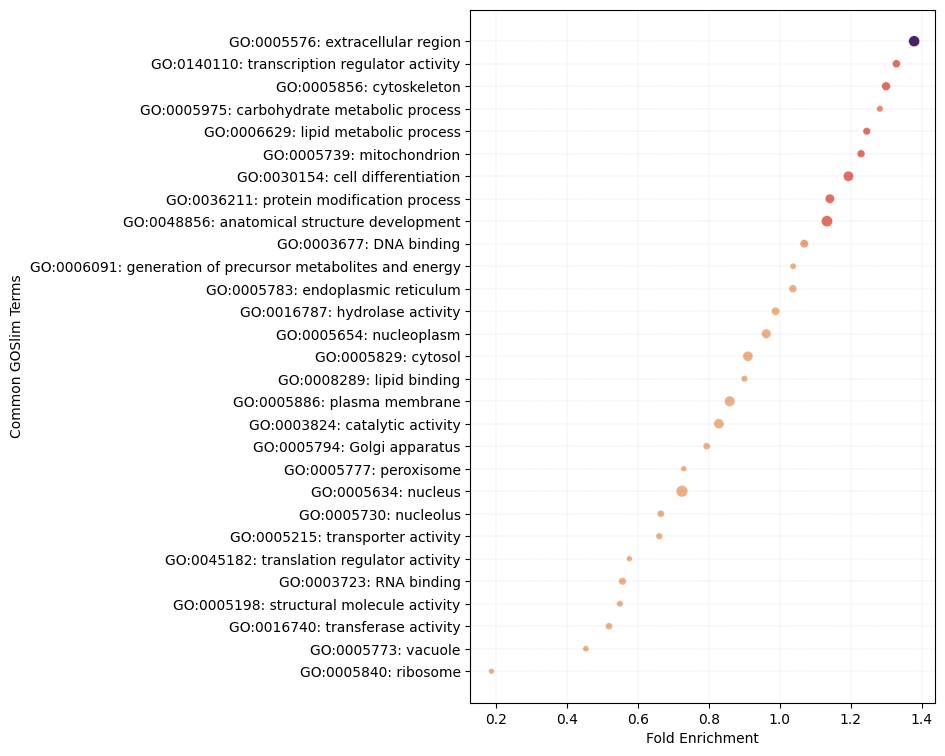

In [12]:
color = sns.color_palette("flare_r", as_cmap=True)

plt.figure(figsize=(6, 9))

dotplot = sns.scatterplot(
    data=human_common,
    x='fold_enrichment',
    y='GOSlim',
    size='counts_up', 
    hue='q_value',     
    palette=color, 
    legend=False
)

plt.grid(color='b', linestyle=':', linewidth=0.1)

plt.xlabel('Fold Enrichment')
plt.ylabel('Common GOSlim Terms')

plt.show()